In [1]:
%pylab inline
import rlcompleter, readline
readline.parse_and_bind('tab: complete')
import numpy as np
from sets import Set
import matplotlib.pyplot as plt
from __future__ import division
from sklearn.metrics.pairwise import euclidean_distances

dataset = np.genfromtxt("Desktop/MordernAnalytics/assignment1/train.csv",delimiter=",")[1:]
label = [row[0] for row in dataset]
train = np.asarray([row[1:] for row in dataset])
target = Set(label)

def findminK(k,a):
    a_sorted = np.argsort(a,axis=0)
#    print(a_sorted)
    k_min = a_sorted[0:k]
#    print(k_min)
    return k_min
#findminK(3,[1,2,5,4,9,0])
def voting(k_nbs,l):
    k_l = []
    for i in range(0,len(k_nbs)):
        t=l[k_nbs[i]]
        k_l.append(t)
    return max(set(k_l), key=k_l.count)
#voting(np.arange(0,9))  
#print(label[0:9])
def KNN(k_train,k_labels,k_test,k):
    results = []
    for i in range(0,k_test.shape[0]):
        distances = []
        for j in range(0,k_train.shape[0]):
            ds = euclidean_distances(k_test[i],k_train[j])
            distances.extend(ds)
#            print(distances)
        k_nbs=findminK(k,distances)
#        print(k_nbs)
        results.append(voting(k_nbs,k_labels))
#        print(results)
    return results
KNN(train[10:100],label[10:100],train[0:10],9)


Populating the interactive namespace from numpy and matplotlib


[1.0, 2.0, 1.0, 1.0, 0.0, 9.0, 7.0, 9.0, 9.0, 3.0]

In [2]:
print(np.asarray(label[0:100]).reshape(10,10))

[[ 1.  0.  1.  4.  0.  0.  7.  3.  5.  3.]
 [ 8.  9.  1.  3.  3.  1.  2.  0.  7.  5.]
 [ 8.  6.  2.  0.  2.  3.  6.  9.  9.  7.]
 [ 8.  9.  4.  9.  2.  1.  3.  1.  1.  4.]
 [ 9.  1.  4.  4.  2.  6.  3.  7.  7.  4.]
 [ 7.  5.  1.  9.  0.  2.  2.  3.  9.  1.]
 [ 1.  1.  5.  0.  6.  3.  4.  8.  1.  0.]
 [ 3.  9.  6.  2.  6.  4.  7.  1.  4.  1.]
 [ 5.  4.  8.  9.  2.  9.  9.  8.  9.  6.]
 [ 3.  6.  4.  6.  2.  9.  1.  2.  0.  5.]]


In [3]:
data = np.genfromtxt("Desktop/MordernAnalytics/assignment1/test.csv",delimiter=",")[1:]
test = np.asarray(data)
print(test.shape)

(28000, 784)


In [4]:
from sklearn.neighbors import NearestNeighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree')
#neigh.fit(train,label) 
#predict_label = neigh.predict(test)

In [15]:
import csv
with open("sklearn_output.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerow(['ImageId','Label'])
    for i in range(0,len(predict_label)):
        writer.writerow([i+1,int(predict_label[i])])

0.9654285714285713

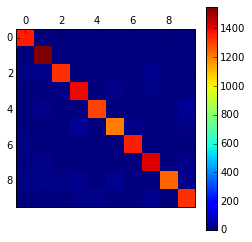

In [20]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree')
def Accuracy(predict,actual):
    T = F =0
    for i in range(0,len(predict)):
        if(predict[i] == actual[i]):
            T+=1
        else:
            F+=1
    accuracy = T/(T+F)
    return accuracy
def ConfusionMatrix(predict,actual):
    cm = np.zeros([10,10])
    predict = map(int,predict)
    actual = map(int,actual)
    for i in range(0,len(actual)):
        cm[actual[i]][predict[i]]+=1
    return cm
def CrossValidation(n_train,train_label):
    start = 0
    end = len(n_train)//3
    acc = 0
    ave_cm = np.zeros([10,10])
    for i in range(0,3):
        ts = n_train[start:end]
        ts_label = train_label[start:end]
        tn = np.delete(n_train,np.arange(start,end),axis=0)
        tn_label = np.delete(train_label,np.arange(start,end),axis=0)
#        print(ts.shape)
        neigh.fit(tn,tn_label)
        p = neigh.predict(ts)
        acc+=Accuracy(p,ts_label)
        start = end
        end+=end
        ave_cm+=ConfusionMatrix(p,ts_label)
    plt.matshow(ave_cm//3)
    plt.colorbar()
    return acc/3    
CrossValidation(train,label)